In [1]:
import tensorflow as tf
import utils

In [2]:
with tf.gfile.GFile('./checkpoint/crnn/frozen_model_custom.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Graph().as_default() as graph:
    tf.import_graph_def(graph_def, name='CRNN')

x = graph.get_tensor_by_name('CRNN/inputs:0')
y = graph.get_tensor_by_name('CRNN/CTCBeamSearchDecoder:1')
seq_len = graph.get_tensor_by_name('CRNN/sequence_length:0')

In [3]:
import matplotlib.pyplot as plt
from DataManager import resize_image
import numpy as np

# file_name = './dataset/iamdataset/line/a01/a01-091/a01-091-08.png'
file_name = './dataset/cvl-database-1-1/train/lines/0000-batch/0052/0052-1-0.tif'

# inputs = resize_image(file_name)
# inputs = np.swapaxes(inputs, axis1=0, axis2=1)
# inputs = np.reshape(inputs, [1, 512, 32, 1])
# inputs.shape

In [8]:
from scipy.misc import imread

def recognise(sess, inputs):
    y_out = sess.run(y, feed_dict={
        x: inputs,
        seq_len: [127]
    })
    return utils.decode_result(y_out)


def calculate_accuracy(original_seq, decoded_seq):
    if len(original_seq) <= len(decoded_seq):
        decoded = [decoded_seq[i] for i in range(len(original_seq))]
    else:
        decoded = [''] * len(original_seq)
        for i in range(len(decoded_seq)):
            decoded[i] = decoded_seq[i]

    count = 0
    # For each character in original sequence
    for e in range(len(original_seq)):
        if original_seq[e] == decoded[e]:
            count += 1

    return count * 1.0 / len(original_seq)

In [10]:
files

['0075-1-0.tif',
 '0075-1-1.tif',
 '0075-1-2.tif',
 '0075-1-3.tif',
 '0075-1-4.tif',
 '0075-1-5.tif',
 '0075-1-6.tif',
 '0075-2-0.tif',
 '0075-2-1.tif',
 '0075-2-2.tif',
 '0075-2-3.tif',
 '0075-2-4.tif',
 '0075-2-5.tif',
 '0075-2-6.tif',
 '0075-3-0.tif',
 '0075-3-1.tif',
 '0075-3-2.tif',
 '0075-3-3.tif',
 '0075-3-4.tif',
 '0075-3-5.tif',
 '0075-4-0.tif',
 '0075-4-1.tif',
 '0075-4-2.tif',
 '0075-4-3.tif']

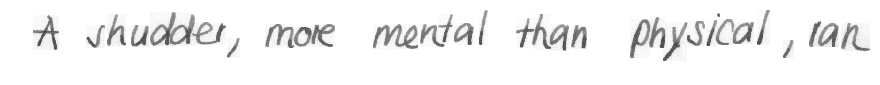

RECOGNISED:   A shudder, more mental than fhpsical, (an


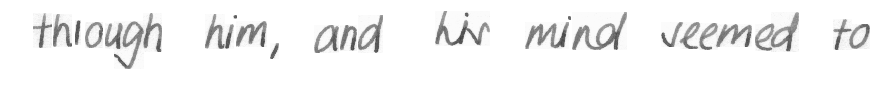

RECOGNISED:   through him, and his Mind veemed to


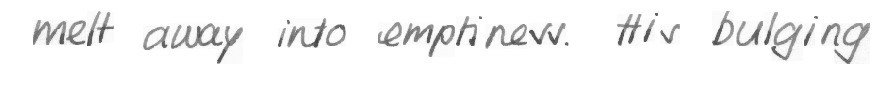

RECOGNISED:   meit auly into uemptines. His DulGing


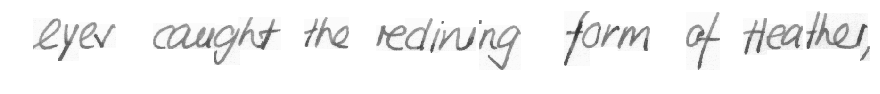

RECOGNISED:   eper caught the redining form of Heather


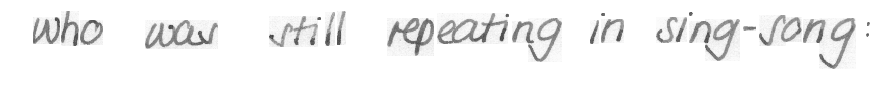

RECOGNISED:   Who war still repeating in ing-On9:


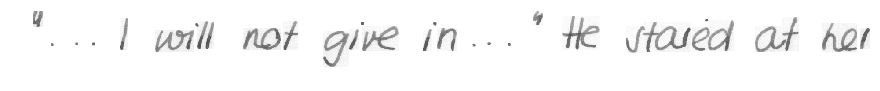

RECOGNISED:   .... I will not give in..." He stared at hel


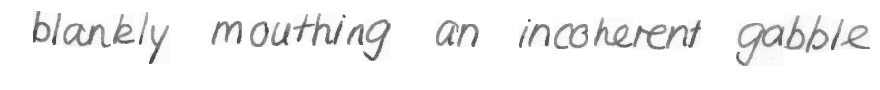

RECOGNISED:   blankly Outhing an incoherent gabble


In [5]:
import os
from PIL import Image

folder = 'dataset/iamdataset/line/m01/m01-000'
files = os.listdir(folder)

with tf.Session(graph=graph) as sess:
    for file in files[:-1]:
        file_name = f'{folder}/{file}'
        inputs = resize_image(file_name)
        inputs = np.swapaxes(inputs, axis1=0, axis2=1)
        inputs = np.reshape(inputs, [1, 512, 32, 1])
        
        plt.figure(figsize=(15,5))
        plt.axis('off')
        plt.imshow(Image.open(file_name))
        plt.show()
        
        print('RECOGNISED:  ', recognise(sess, inputs))

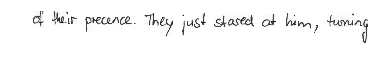

NameError: name 'inputs' is not defined

In [10]:
from PIL import Image
plt.axis('off')

with tf.Session(graph=graph) as sess:
    img = Image.open(file_name)
    plt.imshow(img)
    plt.show()
    print('Recognised:', recognise(sess, inputs))

In [4]:
from DataManager import DataManager
import Levenshtein

In [16]:
avg_distance = 0
avg_accuracy = 0
avg_len = 0

print('Loading data...')
train_feeder = DataManager(train=True)
print('Train size:', train_feeder.size)

indices = [1, 19, 98]

with tf.Session(graph=graph) as sess:
    for i in range(train_feeder.size):
        if i in indices:
            print(i, end=' ')

        _, batch_inputs, batch_text, _ = train_feeder.generate_batch(index=[i])
        predicted = recognise(sess, batch_inputs)

        accuracy = calculate_accuracy(original_seq=batch_text[0], decoded_seq=predicted)
        distance = Levenshtein.distance(batch_text[0], predicted)

        avg_accuracy += accuracy
        avg_distance += distance
        avg_len += len(batch_text[0])

print()
# print('Average accuracy:', avg_accuracy / train_feeder.size)
# print('Average distance:', avg_distance / train_feeder.size)
print('Average length:', avg_len / train_feeder.size)

In [4]:
avg_distance = 0
avg_accuracy = 0
avg_len = 0

print('Loading data...')
val_feeder = DataManager(train=False)
print('Train size:', val_feeder.size)

with tf.Session(graph=graph) as sess:
    for i in range(val_feeder.size):
        if i % 100 == 0:
            print(i, end=' ')

        _, batch_inputs, batch_text, _ = val_feeder.generate_batch(index=[i])
#         predicted = recognise(sess, batch_inputs)

#         accuracy = calculate_accuracy(original_seq=batch_text[0], decoded_seq=predicted)
#         distance = Levenshtein.distance(batch_text[0], predicted)

#         avg_accuracy += accuracy
#         avg_distance += distance
        avg_len += len(batch_text[0])

print()
# print('Average accuracy:', avg_accuracy / val_feeder.size)
# print('Average distance:', avg_distance / val_feeder.size)
print('Average length:', avg_len / val_feeder.size)

Loading data...
Train size: 1861
0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 
Average length: 42.213863514239655


In [5]:
print('Loading data...')
train_feeder = DataManager(train=True)
print('Train size:', train_feeder.size)

Loading data...
Train size: 7061


In [6]:
print('Loading data...')
val_feeder = DataManager(train=False)
print('Train size:', val_feeder.size)

Loading data...
Train size: 1861


./dataset/iamdataset/line/m01/m01-104/m01-104-06.png


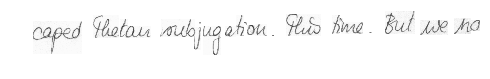

GROUND TRUTH: caped Thetan subjugation. This time. But we no
RECOGNISED:   caped Thelan subjugation. This ime. But we ho
ACCURACY: 65.22
DISTANCE: 3
./dataset/iamdataset/line/m02/m02-090/m02-090-07.png


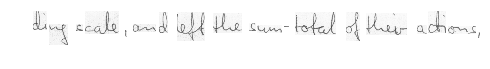

GROUND TRUTH: ding scale, and left the sum-total of their actions,
RECOGNISED:   ling scale, and leff the sum-total of their actions,
ACCURACY: 96.15
DISTANCE: 2
./dataset/iamdataset/line/m01/m01-049/m01-049-04.png


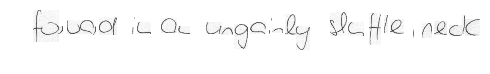

GROUND TRUTH: forward in an ungainly shuffle, neck
RECOGNISED:   fovGod in u ungoinly sluffle, neck
ACCURACY: 5.56
DISTANCE: 8


In [21]:
indices = [55, 224, 4]

with tf.Session(graph=graph) as sess:
    for i in indices:
        batch_id, batch_inputs, batch_text, _ = val_feeder.generate_batch(index=[i])
        predicted = recognise(sess, batch_inputs)
        
        accuracy = calculate_accuracy(original_seq=batch_text[0], decoded_seq=predicted)
        distance = Levenshtein.distance(batch_text[0], predicted)

        ids = batch_id[0].split('-')
        file_name = './dataset/iamdataset/line/{}/{}-{}/{}-{}-{}.png'
        file_name = file_name.format(ids[0], ids[0], ids[1], ids[0], ids[1], ids[2])
        print(file_name)
        
        plt.figure(figsize=(8,2))
        plt.axis('off')
        plt.imshow(Image.open(file_name))
        plt.show()
        print('GROUND TRUTH:', batch_text[0])
        print('RECOGNISED:  ', recognise(sess, batch_inputs))
        print('ACCURACY:', round(accuracy * 100, 2))
        print('DISTANCE:', round(distance, 2))